# Olympic Game Analytics: Cycling – Men’s sprint

## Introduction: 

In the following the data of the last five Olympic Games in the discipline Cycling – Men’s sprint (2000-2016) were collected and analysed. The goal is to represent the sport events in general and outline facts gained out of the data set.
Every table and plot begins with a short description and ends with a result. 
The used code is tested by a unittest class in the end. 

- Team: group26
- Names: 
- Event: sport04 = Cycling – Men’s sprint

# About the game

### Cycling - Sprint men - Summer Olympic Games
Cycling has been contested at every Summer Olympic Games since the birth of the modern Olympic movement at the 1896 Summer Olympics, at which a road race and five track events were held. 
The sprint or match sprint is a track cycling event involving between two and four riders, though it is usually run as a one-on-one match race between opponents who, unlike in the individual pursuit, start next to each other. Men's sprint has been an Olympic event at every games except 1904 (which had races at seven different distances) and 1912 (which had no track cycling events). 
### Rules
As defined by Union Cycliste Internationale (UCI) rules, the first round of competition used to qualify for the sprint competition is the flying 200 m time trial. In this round each rider completes two to three warm up laps and then completes the final 200 m, which is usually just under a lap.
The top riders are seeded in the following rounds, meaning the fastest qualifier will face the slowest qualifier and so on. Knock-out rounds then proceed, initially on a one race basis and then on a best-of three-race format from the quarter-final stage. Riders defeated in the earlier rounds may get a chance to continue in the competition through the repechage races. <br> *(source: wikipedia)*

# Analysis

## Imports

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from datetime import datetime, date
import unittest

## Read the data

In [2]:
athlets = pd.read_csv('athlets.csv')   
sport_events = pd.read_csv('sport_events.csv')

athlets = athlets.rename(columns = {"id" : "athlete_id"})

athlets.date_of_birth = pd.to_datetime(athlets.date_of_birth, dayfirst = True)

display(athlets)
display(sport_events)

,athlete_id,name,nation,date_of_birth,sex
0,1,Jason Kenny,Great Britain,1988-03-23,male
1,2,Callum Skinner,Great Britain,1992-08-20,male
2,3,Matthew Glaetzer,Australia,1992-08-24,male
3,4,Denis Dmitriev,Russia,1986-03-23,male
4,5,Grégory Baugé,France,1985-01-31,male
...,...,...,...,...,...
77,78,Anthony Peden,New Zealand,1970-09-15,male
78,79,Nikolaos Angelidis,Greece,1977-01-22,male
79,80,Julio César Herrera,Cuba,1977-03-11,male
80,81,Christian Arrue,United States,1969-01-08,male


,year,athlete_id,round,rank,time_in_seconds,speedkmh
0,2000,66,heat 1,1,10.956,65.717
1,2000,81,heat 1,2,NaN,NaN
2,2000,67,heat 2,1,11.054,65.135
3,2000,80,heat 2,2,NaN,NaN
4,2000,68,heat 3,1,10.865,66.268
...,...,...,...,...,...,...
335,2016,17,finals,8,10.929,NaN
336,2016,4,finals,3,10.105,NaN
337,2016,3,finals,4,10.177,NaN
338,2016,1,finals,1,10.164,NaN


## Which nations won in the last five Olympic games? 

### Code and Plots

Description of the analysis

1. To answer that question we first have to filter the sport_events dataframe for the final rounds = finals and then filter it for the rank number = 1. We can do this all at once by chained filtering, so chaining the criteria in the boolean index.

2. After that we have to merge the newly created dataframe finals with the athlets dataframe on the athlete_id to get the names and nations of the winners. We call that dataframe finals_with_athletes. 

3. Lastly we create a pandas Series called finals_with_athletes_counted containing a list with the occurrences of the nations in the dataframe finals_with_athletes. 

4. At the end we can plot the finals_with_athletes_counted Series as a piechart. 

,year,athlete_id,round,rank,time_in_seconds,speedkmh,name,nation,date_of_birth,sex
0,2000,66,finals,1,10.874,11.066,Marty Nothstein,United States,1971-02-10,male
1,2004,45,finals,1,10.661,NaN,Ryan Bayley,Australia,1982-03-09,male
2,2008,38,finals,1,10.228,10.216,Chris Hoy,Great Britain,1976-03-23,male
3,2012,1,finals,1,10.232,10.308,Jason Kenny,Great Britain,1988-03-23,male
4,2016,1,finals,1,10.164,NaN,Jason Kenny,Great Britain,1988-03-23,male


<AxesSubplot:ylabel='nation'>

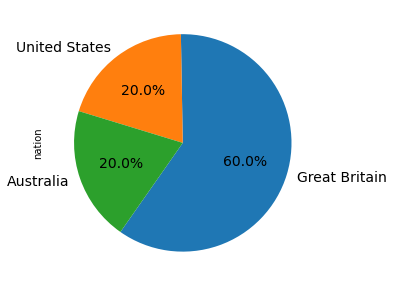

In [3]:
finals = sport_events[(sport_events["round"] == "finals" ) & (sport_events["rank"] == 1 )]

finals_with_athletes = pd.merge(finals,
                                athlets,
                                on ='athlete_id',
                                how ='inner') 

display(finals_with_athletes)

finals_with_athletes_counted = finals_with_athletes["nation"].value_counts()

display(finals_with_athletes_counted.plot(kind='pie',
                                          figsize = (10,5),
                                          startangle=235,
                                          fontsize=14,
                                          autopct='%1.1f%%'))


### Result

Description of the results: 

Great Britain won the most of the finals with 3 times. 
Here is an overview of the winners in the last five years: 


2000 | 2004 | 2008 | 2012, 2016
- | - |- |- |
Marty Nothstein | Ryan Bayley | Chris Hoy | Jason Kenny
United States | Australia| Great Britain | Great Britain
<img src="pictures/marty.jpg" alt="marty" style="width: 200px;"/> | <img src="pictures/gettyimages-51217778-1024x1024.jpg" alt="Bayley" style="width: 200px;"/> | <img src="pictures/images.jpg" alt="Hoy" style="width: 200px;"/> |  <img src="pictures/Jason.jpg" alt="Jason" style="width: 200px;"/>


## How often did the Nations take part in the last five Olympic Games? 

### Code and Plots

Description of the analysis

1. To answer that question we first have to merge the the two dataframes sport_events and athlets on the athlete_id. 

2. After that we can group the dataframe by "nation". From that grouped dataframe we take a look only at the feature "year" and count how many times the unique nation appears per year. 

3. Lastly we sort the Series ascendingly. 

4. At the end we can plot the Series as a horizontal barchart.

<AxesSubplot:ylabel='nation'>

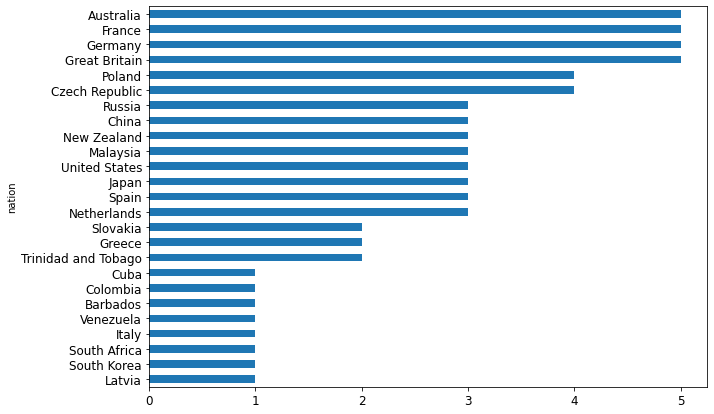

In [4]:
events_with_athletes = pd.merge(sport_events,
                                athlets,
                                on ='athlete_id',
                                how ='inner')

display(events_with_athletes
        .groupby('nation')
        .nunique()["year"]
        .sort_values(ascending = True)
        .plot(kind='barh',
              figsize = (10,7),
              fontsize = 12))



### Result

Description of the results: 

The countries that took part the most (in all five games) are Australia, France, Germany and Great Britain. 

## What is the mean age of the nations teams at time of race ? 

### Code and Plots

Description of the analysis

1. We have to calculate the age of each of the athletes by taking his birthday and the time of the event which mostly was in august of the year the games took place. So we also hand over the year of the games. Then the with the datetime package we can calcualte the age of the athletes. The age then gets assigned to the "age_at_event" column created and filled with nans before. 

2. Then we create a DataFrame from the events_with_athletes from step 1 where we drop the duplicated athletes per year so we dont use the age several times when calculating the mean. Then we group the dataframe by nation and calculate the mean for the age per nation. After that we sort the values to look better in the plot. 

3. At the end we can plot the mean_age_per_nation DataFrame as a horizontal barplot. 

<AxesSubplot:ylabel='nation'>

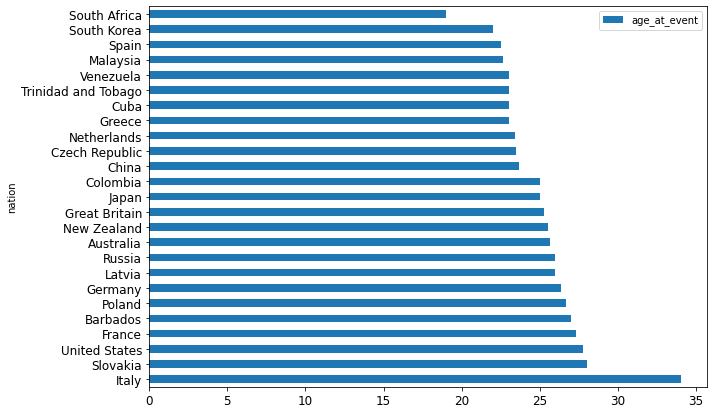

In [5]:
def calculate_the_age(birthdate, year_of_event):
    """ Calculates the age of each athlete with the date of the olympic game on 01.08. of the year the game took place"""
    time_of_event = datetime.strptime("01.08."+ str(year_of_event), "%d.%m.%Y").date()
    
    return time_of_event.year - birthdate.year - ((time_of_event.month, time_of_event.day) < (birthdate.month, birthdate.day))

events_with_athletes['age_at_event'] = np.nan

for row in events_with_athletes.iterrows(): 
    events_with_athletes.loc[row[0], 'age_at_event'] = (calculate_the_age(events_with_athletes['date_of_birth'][row[0]], 
                                                                          events_with_athletes['year'][row[0]]))

mean_age_per_nation = pd.DataFrame(events_with_athletes
                                   .drop_duplicates(subset=['year', 'athlete_id'], keep="first")
                                   .groupby('nation')
                                   .age_at_event.mean()
                                   .sort_values(ascending = False))

display(mean_age_per_nation.plot.barh(figsize = (10,7), fontsize = 12))


### Result

Description of the results: 

The oldest nation on average was Italy. The youngest nation on average was South Africa. 


## Which nation was the fastest?


### Code and Plots

Description of the analysis: 

1. First we filter the events_with_athletes DataFrame for time_in_seconds <= 9.5 because that are wrong data (an error during scraping the data) and replace it with nans. 
2. Create table out of merged2 (events_with_athlets) grouped by nation and aggregating the mean, min and max value of time_in_seconds
3. Round the values and sort the results by the average
4. To create a boxplot, we need the original time values to visualize the min, max and mean --> merge with original table merged2 <br>
    * Why did we not only use merged2? The advantage of merging is, that we can sort the boxplot by min, max and mean. In this case by mean

,nation,time_mean,time_min,time_max
17,Russia,10.249625,10.102,10.690
22,Trinidad and Tobago,10.437750,10.221,10.545
24,Venezuela,10.439000,10.439,10.439
15,New Zealand,10.448333,10.159,10.801
3,Colombia,10.486200,10.272,10.982
8,Great Britain,10.491536,10.119,11.214
16,Poland,10.512667,10.177,10.848
2,China,10.523000,10.373,10.753
0,Australia,10.634960,10.165,11.805
7,Germany,10.672160,10.225,11.104


<AxesSubplot:xlabel='time_in_seconds', ylabel='nation'>

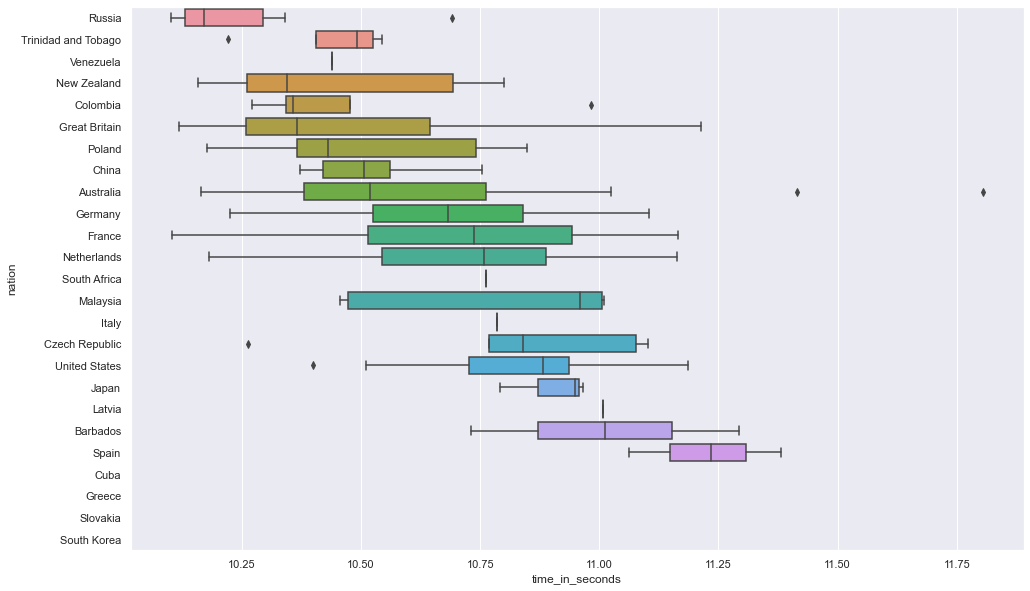

In [6]:
merged2 = events_with_athletes

merged2['time_in_seconds'] = np.where((merged2.time_in_seconds.astype(float) <= 9.5),np.nan,merged2.time_in_seconds)

tmp = merged2.groupby('nation', as_index=False).agg({'time_in_seconds': ['mean', "min", "max"]})
tmp.time_in_seconds.round(3)
tmp.columns = ['nation', 'time_mean', 'time_min', 'time_max']
tmp.sort_values(by='time_mean', inplace=True, ascending=True)
display(tmp)


merged3 = pd.merge(merged2,tmp,on ='nation', how ='inner')
merged3.sort_values(by='time_mean', inplace=True, ascending=True)

sns.set(rc={'figure.figsize':(16,10)})
sns.boxplot(data = merged3, x='time_in_seconds', y='nation')

### Result

Description of the results: 

As a result you can see that Russia was the fastest nation on average in the last 20 years. As lower the nation as slower the average. If there is no box, that means there are not times recoreded. Therefore these nations never won a race in any round, because you only get a time as a winner. 
<br> --> Cuba, Greece, Slovakia and South Korea have never come further than Heat 1-8.

In addition you can see the different ranges of times by nation. So the left start of the box shows the minimum (fastest time) and on the right, where the box ends, the maximum (slowest time) a nation drove and won. 

As you now a certain nation is disqualified from Olympia due to doping.. guess who :D

## How do the round times change over the course of the years ?

(Correlation of years and round time)

### Code and Plots

Description of the analysis: 

1. On the basis of the merged DataFrame of sport events and athletes we can create a scatter plot with the package Seaborn. 

2. Therefore we hand over the values for the x-axis = "year" and the y axis: "time_in_seconds". 


<AxesSubplot:xlabel='year', ylabel='time_in_seconds'>

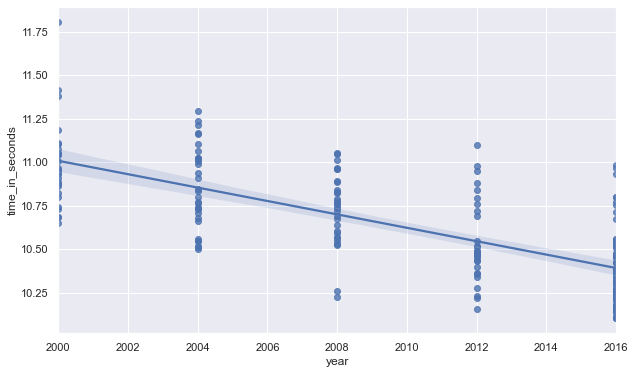

In [7]:
sns.set(rc={'figure.figsize':(10,6)})
display(sns.regplot(events_with_athletes[events_with_athletes['time_in_seconds']>8]['year'],events_with_athletes[events_with_athletes['time_in_seconds']>8]['time_in_seconds']))


### Result

Description of the results: 

The plot shows that there is a clear trend that every year the round times get smaller. So the Cyclists in each year are faster. The mean changes from 11.00 seconds in 2000 to nearly 10.40 in 2016. 


# Tests

In [8]:
from os import path

class OlympicGameTests(unittest.TestCase):

    """ class for the Olympic game unittests """

    def test_if_sport_events_file_path_conatins_file(self):
        """ Test if sport_events file path contains file """
        file = 'sport_events.csv'
        self.assertTrue(path.isfile(file)==True)
        self.assertFalse(path.isfile(file) == False)    
        
    def test_if_athlete_dataframe_not_empty(self):
        """ Test if athlete dataframe is not empty """
        self.assertTrue(len(athlets) != 0)
        self.assertFalse(len(athlets) == 0)    
        
    def test_if_finals_dataframe_contains_5_entries(self):
        """ Test if finals dataframe contains 5 entries """
        self.assertTrue(len(finals_with_athletes) == 5)
        self.assertFalse(len(finals_with_athletes) != 5)      
        
    def test_if_Germany_is_in_nation_list(self):
        """ Test if germany is in nation list """
        self.assertIn('Germany', list(tmp.nation))

    def test_if_mean_for_russia_is_calculated(self):
        """ Test if mean for russia is calculated """
        self.assertIsNotNone(merged3[merged3["nation"] == "Russia"].time_mean[304])

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored','-v'], exit=False)

test_if_Germany_is_in_nation_list (__main__.OlympicGameTests)
Test if germany is in nation list ... ok
test_if_athlete_dataframe_not_empty (__main__.OlympicGameTests)
Test if athlete dataframe is not empty ... ok
test_if_finals_dataframe_contains_5_entries (__main__.OlympicGameTests)
Test if finals dataframe contains 5 entries ... ok
test_if_mean_for_russia_is_calculated (__main__.OlympicGameTests)
Test if mean for russia is calculated ... ok
test_if_sport_events_file_path_conatins_file (__main__.OlympicGameTests)
Test if sport_events file path contains file ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.004s

OK
